In [14]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the data (features) and labels
# For this example, we'll assume that we have some labels (e.g., binary classification: 0 or 1)
X = np.array([[2.5, 3.4], [1.3, 2.3], [3.1, 4.0], [5.4, 2.1],
              [6.2, 3.2], [5.8, 4.2], [3.5, 5.1], [4.5, 3.8],
              [6.1, 2.8], [2.0, 3.0]])  # Input data (features)

# Labels corresponding to each data point (example: 0 or 1)
y = np.array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

# Create a KNN classifier (k=3 in this example)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier with the training data
knn.fit(X, y)

# Define a new data point to predict the class for
new_data_point = np.array([[5.3, 2.5]])

# Predict the class of the new data point
predicted_class = knn.predict(new_data_point)

print(f"The predicted class for the new data point {new_data_point} is: {predicted_class[0]}")


The predicted class for the new data point [[5.3 2.5]] is: 1


In [20]:
import numpy as np


def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


def get_neighbors(training_data, test_point, k):
    distances = []
    for train_point in training_data:
        distance = euclidean_distance(np.array(train_point[:-1]), np.array(test_point))
        distances.append((train_point, distance))


    distances.sort(key=lambda x: x[1])


    neighbors = [distance[0] for distance in distances[:k]]

    return neighbors


def predict(training_data, test_point, k):
    neighbors = get_neighbors(training_data, test_point, k)


    labels = [neighbor[-1] for neighbor in neighbors]
    prediction = max(set(labels), key=labels.count)

    return prediction


training_data = [
    [2.5, 3.4, 0],
    [1.3, 2.3, 0],
    [3.1, 4.0, 0],
    [5.4, 2.1, 1],
    [6.2, 3.2, 1],
    [5.8, 4.2, 1],
    [3.5, 5.1, 0],
    [4.5, 3.8, 0],
    [6.1, 2.8, 1],
    [2.0, 3.0, 0]
]


new_data_point = [5.3, 2.5]


k = 5


predicted_class = predict(training_data, new_data_point, k)

print(f"The predicted class for the new data point {new_data_point} is: {predicted_class}")


The predicted class for the new data point [5.3, 2.5] is: 1


In [21]:
import numpy as np

# Function to compute the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to perform K-Means clustering
def k_means_clustering(data, k, max_iters=100):
    # Initialize centroids by randomly selecting k points
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    prev_centroids = np.zeros(centroids.shape)
    labels = np.zeros(data.shape[0])

    for _ in range(max_iters):
        # Assign each point to the closest centroid
        for i in range(data.shape[0]):
            distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
            labels[i] = np.argmin(distances)

        # Calculate new centroids as the mean of points in each cluster
        for i in range(k):
            points_in_cluster = data[labels == i]
            if len(points_in_cluster) > 0:
                centroids[i] = np.mean(points_in_cluster, axis=0)

        # If centroids don't change, break
        if np.all(centroids == prev_centroids):
            break
        prev_centroids = centroids.copy()

    return centroids, labels

# Function to predict the label of a new point based on the nearest cluster
def predict_cluster_label(data, new_data_point, centroids, labels, k):
    # Find the closest centroid
    distances = [euclidean_distance(new_data_point, centroid) for centroid in centroids]
    closest_centroid = np.argmin(distances)

    # Get the points in the cluster of the closest centroid
    cluster_points = data[labels == closest_centroid]

    # Count the frequency of labels in the cluster
    unique_labels, counts = np.unique(cluster_points[:, -1], return_counts=True)
    predicted_label = unique_labels[np.argmax(counts)]  # Majority vote

    return predicted_label

# Define the data (features and labels) - last element is the label
training_data = np.array([
    [2.5, 3.4, 0],  # Feature points with labels
    [1.3, 2.3, 0],
    [3.1, 4.0, 0],
    [5.4, 2.1, 1],
    [6.2, 3.2, 1],
    [5.8, 4.2, 1],
    [3.5, 5.1, 0],
    [4.5, 3.8, 0],
    [6.1, 2.8, 1],
    [2.0, 3.0, 0]
])

# Define a new data point to predict
new_data_point = np.array([4.0, 3.5])

# Number of clusters (k)
k = 2

# Perform K-Means clustering
centroids, labels = k_means_clustering(training_data[:, :-1], k)

# Predict the label for the new data point
predicted_class = predict_cluster_label(training_data, new_data_point, centroids, labels, k)

print(f"The predicted class for the new data point {new_data_point} is: {predicted_class}")


The predicted class for the new data point [4.  3.5] is: 0.0


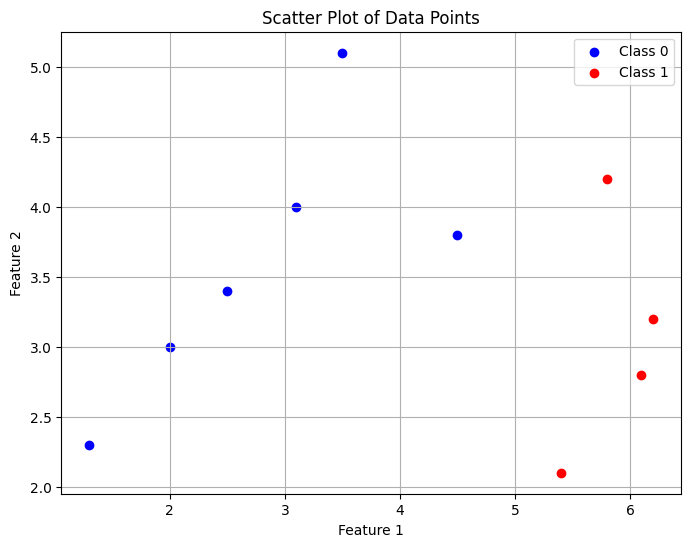

In [22]:
# prompt: make scatter lot with  [2.5, 3.4, 0],
#     [1.3, 2.3, 0],
#     [3.1, 4.0, 0],
#     [5.4, 2.1, 1],
#     [6.2, 3.2, 1],
#     [5.8, 4.2, 1],
#     [3.5, 5.1, 0],
#     [4.5, 3.8, 0],
#     [6.1, 2.8, 1],
#     [2.0, 3.0, 0]

import matplotlib.pyplot as plt

# Data points
data = [
    [2.5, 3.4, 0],
    [1.3, 2.3, 0],
    [3.1, 4.0, 0],
    [5.4, 2.1, 1],
    [6.2, 3.2, 1],
    [5.8, 4.2, 1],
    [3.5, 5.1, 0],
    [4.5, 3.8, 0],
    [6.1, 2.8, 1],
    [2.0, 3.0, 0]
]

# Separate features and labels
X = [point[:2] for point in data]
y = [point[2] for point in data]

# Create the scatter plot
plt.figure(figsize=(8, 6))
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='blue', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='red', label='Class 1' if i == 3 else "")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Data Points")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# prompt: fit blue data

# Assuming 'data' is your dataset and you want to fit a model to the blue data points
# The provided code already separates features (X) and labels (y) based on color

# Filter the data points for class 0 (blue points)
blue_data_indices = [i for i, label in enumerate(y) if label == 0]
blue_X = [X[i] for i in blue_data_indices]
blue_y = [y[i] for i in blue_data_indices]

# Now you can fit your model using only the blue data points:
# Example using KNN:
knn_blue = KNeighborsClassifier(n_neighbors=3)  # Initialize KNN
knn_blue.fit(blue_X, blue_y)  # Fit KNN to blue data points only

# You can then make predictions on new data points using knn_blue
# ...


KNeighborsClassifier(n_neighbors=3)